In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

## Dataset

In [2]:
class_ref = pd.read_csv('dataset/class.csv').loc[:, ['Class_Number', 'Class_Type']]
zoo = pd.read_csv('dataset/zoo.csv').iloc[:, 1:]
zoo.head()

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  class_type  
0         1         0     0     4     0         0        1           1  
1         1         0     0     4     1         0        1           1  
2         0         0     1     0     1         0        0           4  
3         1         0     0     4     0         0        1           1  
4         1         0     0     4     1         0        1           1

In [3]:
class_ref

Class_Number    Class_Type
0             1        Mammal
1             2          Bird
2             3       Reptile
3             4          Fish
4             5     Amphibian
5             6           Bug
6             7  Invertebrate

#### Setting the dependent and independent variables

In [4]:
zoo_X = zoo.drop('class_type', axis=1)
zoo_y = zoo.loc[:, 'class_type']

## Splitting to train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(zoo_X, zoo_y, test_size=0.15)

## Initialize Logistic Regression model

In [6]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Use X_test for prediction**

In [10]:
predicted_val_log = logistic_model.predict(X_test)

**Since the index has been randomized, reset it**

In [11]:
X_test.reset_index(drop=True, inplace=True)

**Concatenate X_test with predicted_val to combine them into one DataFrame**

In [13]:
predicted_data_log = pd.concat((X_test, pd.Series(predicted_val_log, name='predicted')), axis=1)
predicted_data_log.head()

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     0         0     1     0         0        0         0        0         0   
1     0         1     1     0         1        0         1        0         1   
2     0         0     0     0         0        0         1        0         0   
3     0         0     1     0         0        1         1        0         0   
4     1         0     0     1         0        0         0        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  predicted  
0         1         0     0     6     0         0        0          6  
1         1         0     0     2     1         0        0          2  
2         1         1     0     8     1         0        0          6  
3         0         0     0     6     0         0        0          7  
4         1         0     0     4     1         0        1          1

**Replace the class number with the class type**

In [14]:
class_ref_dct = dict(zip(class_ref['Class_Number'], class_ref['Class_Type']))
predicted_data_log['predicted'].replace(class_ref_dct, inplace=True)

In [15]:
class_ref_dct

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [16]:
predicted_data_log.head()

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     0         0     1     0         0        0         0        0         0   
1     0         1     1     0         1        0         1        0         1   
2     0         0     0     0         0        0         1        0         0   
3     0         0     1     0         0        1         1        0         0   
4     1         0     0     1         0        0         0        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize     predicted  
0         1         0     0     6     0         0        0           Bug  
1         1         0     0     2     1         0        0          Bird  
2         1         1     0     8     1         0        0           Bug  
3         0         0     0     6     0         0        0  Invertebrate  
4         1         0     0     4     1         0        1        Mammal

## Bar chart

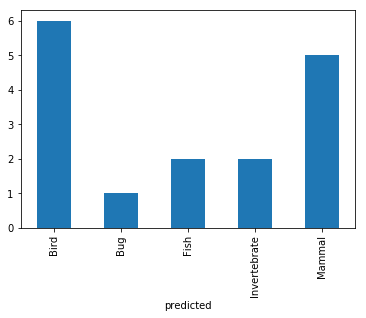

In [34]:
predicted_data_log.pivot_table(index='predicted', aggfunc='count')['backbone'].plot(kind='bar')

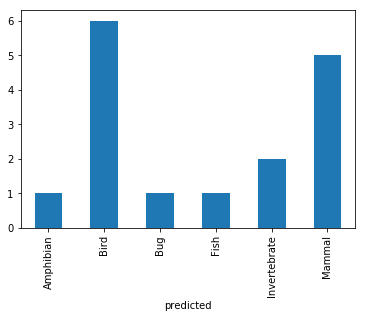

In [35]:
predicted_data_tree.pivot_table(index='predicted', aggfunc='count')['backbone'].plot(kind='bar')

## Accuracy

In [7]:
logistic_model.score(X_test, y_test)

0.9375

In [37]:
tree_model.score(X_test, y_test)

0.9375